In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
t = Table.read('/home/aalvarez/Work/Data/sim11/sim11_cat.fits')
ref = Table.read('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim11/ref/sim11_r_01_reference.fits')

In [3]:
t.columns['world_centroid_alpha'].unit = u.deg
t.columns['world_centroid_delta'].unit = u.deg

In [4]:
snr = (t['isophotal_flux'] / t['isophotal_flux_err']) > 10
t = t[snr]

In [5]:
# Cross-match
spp_coords = SkyCoord(t['world_centroid_alpha'], t['world_centroid_delta'])
sex_coords = SkyCoord(ref['ALPHA_SKY'], ref['DELTA_SKY'])
idx_sex, dist, _, = spp_coords.match_to_catalog_sky(sex_coords)

In [6]:
mask = dist.arcsec < 0.5
idx_sex = idx_sex[mask]
t = t[mask]

In [10]:
growth_nsteps = t['flux_growth'].shape[2]
print(growth_nsteps, ref['FLUX_GROWTH'].shape[1])

32 32


In [11]:
idx = [55, 68, 50, 95, 0]

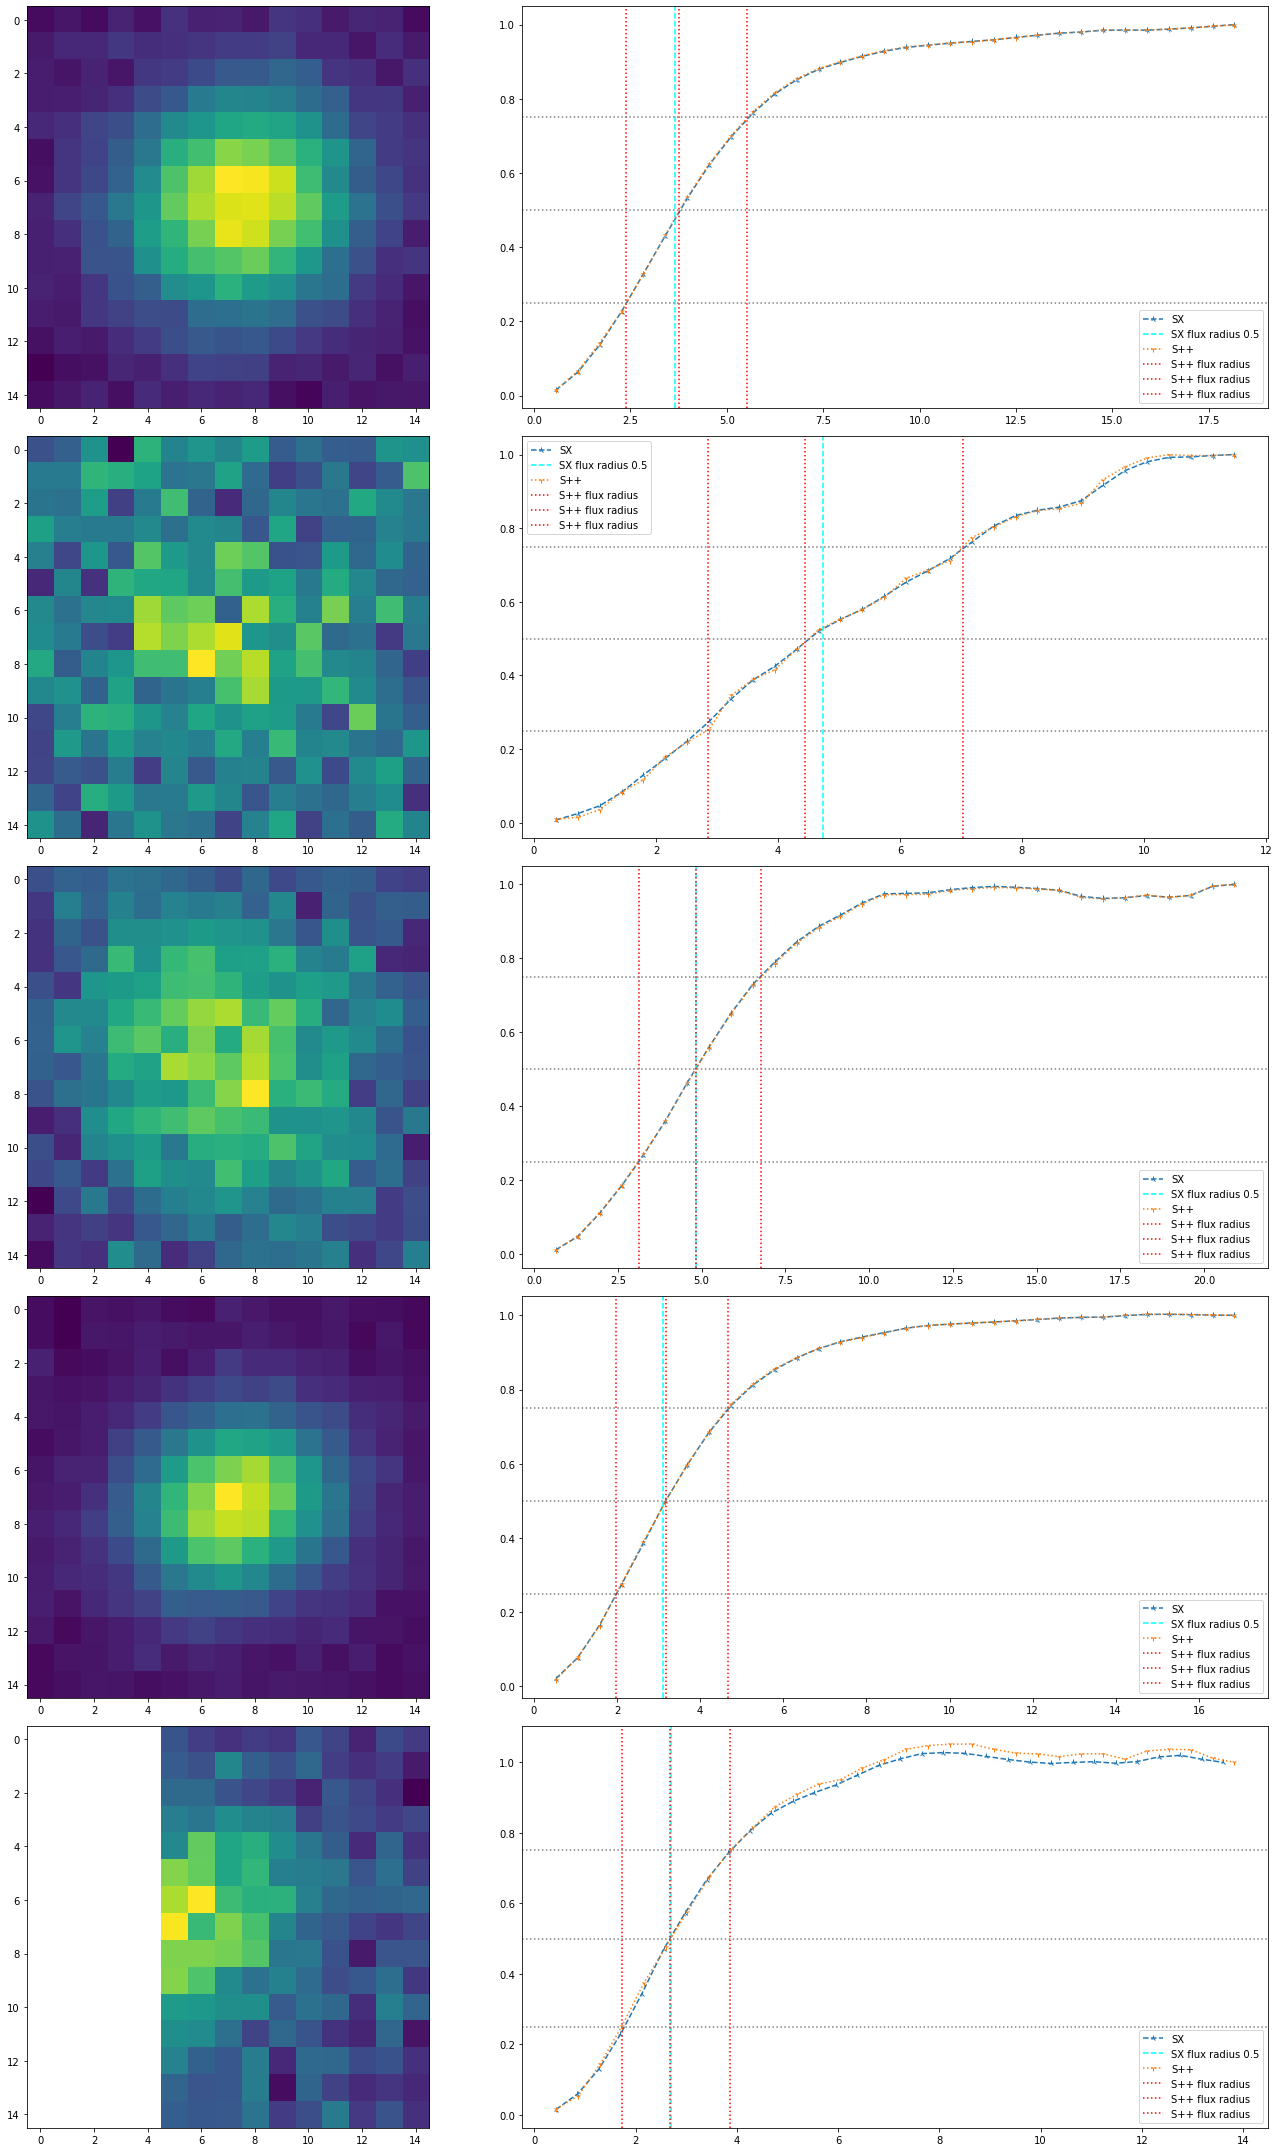

In [16]:
fig, axes = plt.subplots(nrows = len(idx), ncols=2, figsize=(20,30))
for i, ax in zip(idx, axes):
    obj = t[i]
    ref_obj = ref[idx_sex[i]]
    growth_px = np.arange(1, growth_nsteps + 1) * obj['flux_growth_step']
    growth_ref_px = np.arange(1, growth_nsteps + 1) * ref_obj['FLUX_GROWTHSTEP']
    ax[0].imshow(obj['vignet'])
    ax[1].plot(growth_ref_px, ref_obj['FLUX_GROWTH']/ref_obj['FLUX_GROWTH'][-1], '2--', label=f'SX')
    ax[1].axvline(ref_obj['FLUX_RADIUS'], linestyle='--', c='cyan', label='SX flux radius 0.5')
    ax[1].plot(growth_px, obj['flux_growth'][0] / obj['flux_growth'][0, -1], '1:', label=f'S++')
    for r in obj['flux_radius'][0]:
        ax[1].axvline(r, linestyle=':', c='red', label=f'S++ flux radius')
    ax[1].axhline(0.25, linestyle=':', c='gray')
    ax[1].axhline(0.5, linestyle=':', c='gray')
    ax[1].axhline(0.75, linestyle=':', c='gray')
    ax[1].legend()
    
plt.tight_layout()